In [37]:
import sys
from __future__ import division

In [38]:
import numpy as np
from phasor.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

In [39]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced
from phasor.utilities.ipynb.sympy import *

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 
from phasor import mechanical

b'2017-09-22 09:45:51 -0400 (a76310c5d4476904171a3f1b18117db454719432)'


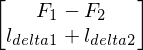

In [52]:
M = sympy.var('M')
k = sympy.var('k')

s = sympy.var('s')

d_l1 = sympy.var('l_delta1')
F1 = sympy.var('F_1')
d_l2 = sympy.var('l_delta2')
F2 = sympy.var('F_2')

Z_m = sympy.var('Z_m', real = True)
k_m = sympy.sqrt(1/sympy.im(Z_m))
k_m = sympy.var('k_m', real = True)
k_m = sympy.sympify(1)

expr1 = M * d_l1 * s**2  - F2
display(expr1)

rel = sympy.Matrix([[M * s**2, -1]])
rel = sympy.Matrix([[k, -1]])
rel = sympy.Matrix([
    [1, 0,  -1,0],
    [0,1,0, 1],
])
var = sympy.Matrix([F1, d_l1, F2, d_l2])
rel * var

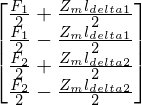

In [53]:
trans = sympy.Matrix([
    [k_m/2,  k_m/2 * Z_m            ,0,0, ],
    [k_m/2, -k_m/2 * Z_m.conjugate(),0,0, ],
    [0,0, k_m/2,  k_m/2 * Z_m            ],
    [0,0, k_m/2, -k_m/2 * Z_m.conjugate()],
])
trans * var

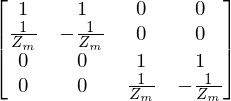

In [54]:
trans**-1

In [55]:
rel_ab = rel * trans**-1
rel_a = rel_ab[:,::2]
rel_b = rel_ab[:,1::2]


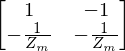

In [56]:
rel_b

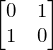

In [57]:
rel_atob = -rel_b**-1 * rel_a
rel_atob.simplify()
rel_atob